# Classificação de Presença de Fumaça para uso em equipamentos de IOT

## Importando Bibliotecas

In [131]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# classificadores
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

## Importando e conhecendo a Base de Dados

Originalmente da plataforma Kaggle disponibilizado no link: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset


* UTC: Timestamp UTC seconds
* Temperature[C]: Temperatura do Ar
* Humidity[%]: Humidade do Ar
* TVOC[ppb]: Compostos Orgânicos Voláteis Totais (medida em partes por bilhão)
* eCO2[ppm]: Concentração equivalente de CO2on (medida em partes por milhão)
* Raw H2: Hidrogênio molecular bruto
* Raw Ethanol: Gás etanol bruto
* Pressure[hPa]: Pressão do ar
* PM1.0 e PM2.0: Tamanho do material particulado < 1,0 µm (PM1.0). 1,0 µm < 2,5 µm (PM2.5)
* NC0.5, NC1.0, NC2.5: Número de concentração de material particulado. Isso difere do PM porque NC fornece o número real de partículas no ar. A NC bruta também é classificada pelo tamanho da partícula: < 0,5 µm (NC0.5); 0,5 µm < 1,0 µm (NC1.0); 1,0 µm < 2,5 µm (NC2.5)
* CNT: Contador de Amostra
* Fire Alarm: Alarme de incêndio


In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/ASDFSFDEASC/LPII/main/smoke_detection_iot.csv')
df = df.drop(['Unnamed: 0','UTC','CNT'], axis=1)
df.head()

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0          20.000        57.36          0        400   12306        18520   
1          20.015        56.67          0        400   12345        18651   
2          20.029        55.96          0        400   12374        18764   
3          20.044        55.28          0        400   12390        18849   
4          20.059        54.69          0        400   12403        18921   

   Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
0        939.735    0.0    0.0    0.0    0.0    0.0           0  
1        939.744    0.0    0.0    0.0    0.0    0.0           0  
2        939.738    0.0    0.0    0.0    0.0    0.0           0  
3        939.736    0.0    0.0    0.0    0.0    0.0           0  
4        939.744    0.0    0.0    0.0    0.0    0.0           0

### Verificando dados faltosos

In [133]:
df.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

## Distribuição de Alarme de Incêndio

Alarme de Incêndio é acionado no Laranja, caso contrário é Azul

Text(0.5, 1.0, 'Alarme de Incêndio')

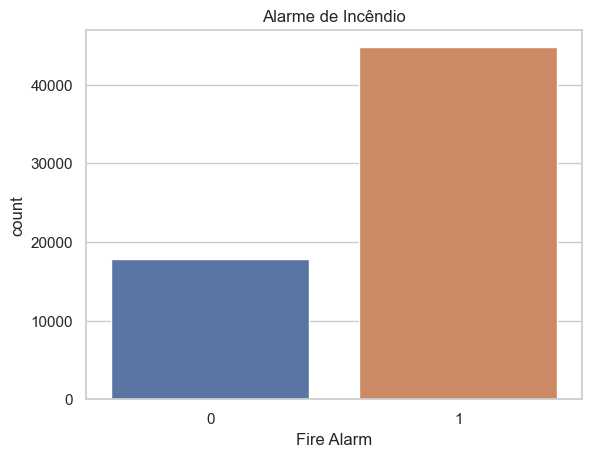

In [134]:
sns.countplot(x='Fire Alarm',data=df)
plt.title('Alarme de Incêndio')

## Gráfico de correlação em pares de variáveis

Alarme de Incêndio em Laranja, caso contrário é Azul

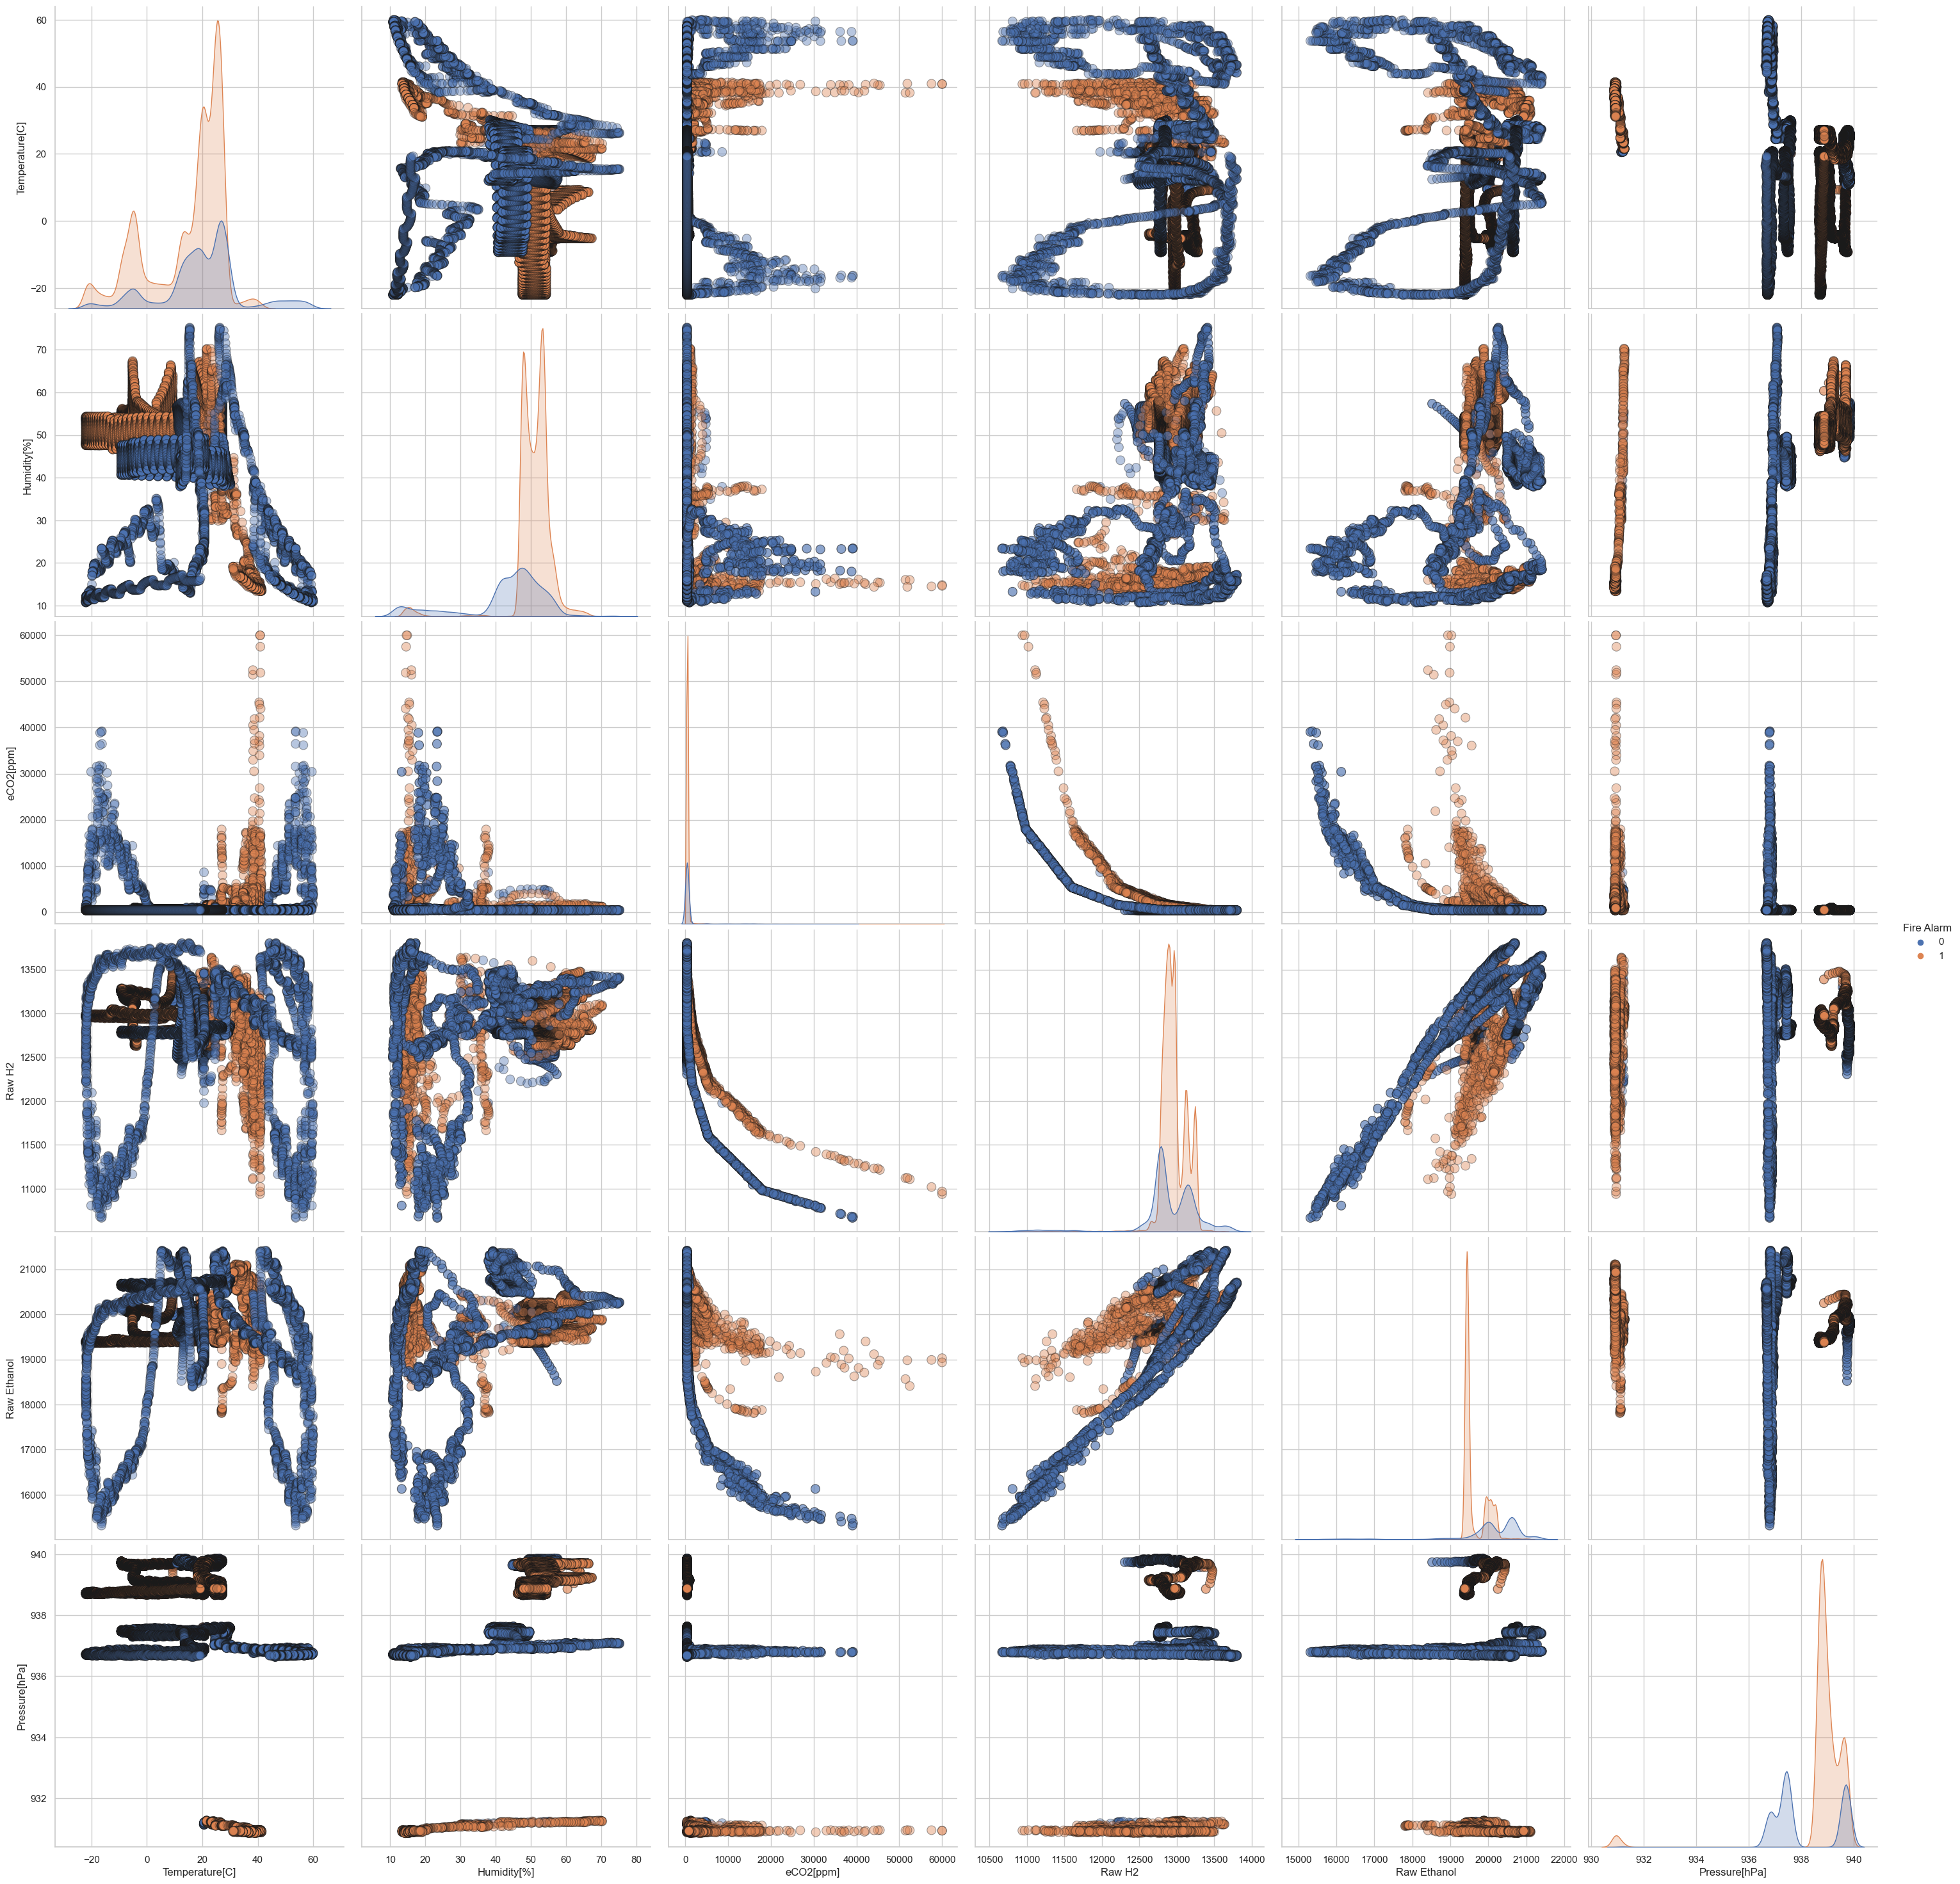

In [135]:
sns.pairplot(df, vars=["Temperature[C]", "Humidity[%]", "eCO2[ppm]","Raw H2","Raw Ethanol","Pressure[hPa]"], hue="Fire Alarm", diag_kind='kde', plot_kws={"alpha":0.4, 's':100, "edgecolor":'k'}, height=5)

## Modelos de Classificações e Treino

Treino em 30%, 40%, 50%, 60% e 70% do tamanho da base total

In [136]:
# Classificadores que serão utilizados para a predição
classificadores = {
    "BernoulliNB": BernoulliNB(),
    "KNeighborsClassifier": KNeighborsClassifier(3),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100),
    "LinearSVC": LinearSVC()
}

In [ ]:
# Proporção da base de teste
tests = [0.7, 0.6, 0.5, 0.4, 0.3]
acuracias = {}

X = df.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

# Treino com multiplos classificadores
for classificador in classificadores.values():
    acuracias[str(classificador)] = []
    # Treino com várias proporçoes de teste
    for test in tests:
        # Divisão em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)

        # Criação do modelo de Classificação
        model = classificador.fit(X_train, y_train)

        # Realizando a classificação com os dados de teste
        y_pred = model.predict(X_test)

        # Acurácia do Modelo
        acc = accuracy_score(y_test, y_pred)
        acuracias[str(classificador)].append(acc)

## Resultado do Treinamento

Quanto mais próximo de 1 a acurácia, melhor a eficácia do modelo

In [138]:
treinos = ['30%', '40%', '50%', '60%', '70%']
data = pd.DataFrame(acuracias, index=treinos)
data

BernoulliNB()  KNeighborsClassifier(n_neighbors=3)  \
30%       0.737643                             0.999544   
40%       0.739555                             0.999601   
50%       0.741562                             0.999776   
60%       0.739462                             0.999601   
70%       0.739795                             0.999787   

     DecisionTreeClassifier()  RandomForestClassifier()  LinearSVC()  
30%                  0.999088                  0.999932     0.880546  
40%                  0.999494                  0.999867     0.878067  
50%                  0.999872                  0.999904     0.873830  
60%                  0.999601                  0.999800     0.880529  
70%                  0.999787                  1.000000     0.877109

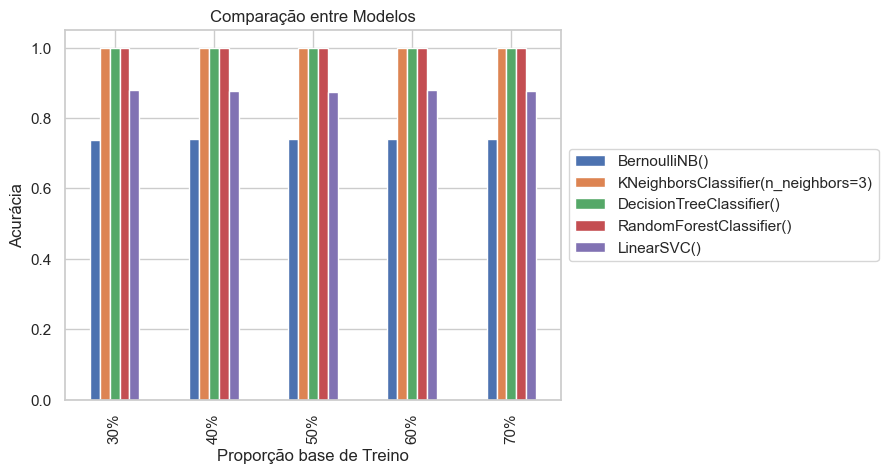

In [139]:
data.plot(kind='bar')
plt.title('Comparação entre Modelos') #adicionando o título
plt.ylabel('Acurácia')
plt.xlabel('Proporção base de Treino')
plt.legend(bbox_to_anchor=(1.00, 0.7))
plt.show()

## Conclusão

Com isso podemos definir o modelo **RandomForestClassifier()** como o melhor levando em conta **70% para a base de treino**.

Também não podemos deixar de citar **KNeighborsClassifier(n_neighbors=3)**	e **DecisionTreeClassifier()** por alcançarem pontuações altas indenpendente do tamanho da base de treino.